In [1]:
#Bring in the Health Care Facilities with JSON

import pandas as pd

import json      # library for working with JSON-formatted text strings
import requests  # library for accessing content from web URLs

import pprint    # library for cleanly printing Python data structures
pp = pprint.PrettyPrinter()


## Start off by mapping and reading data from geojson URLs

In [113]:
# download data on facilities

facilities_url = "https://data.sfgov.org/resource/jhsu-2pka.geojson"
facilities_response = requests.get(facilities_url)
facilities_results = facilities_response.text

In [114]:
# what's the data type of the results?

type(facilities_results)

str

In [115]:
# print the first 500 characters to see a sample of the data

print(facilities_results[:500])

{ "type": "FeatureCollection", "features": [{"type":"Feature","geometry":{"type":"Point","coordinates":[-122.4358177,37.76905419]},"properties":{"facility_type":"General Acute Care Hospital","services":"Hospital","oshpd_id":"106380933","uid":"2","facility_name":"California Pacific Med Ctr-davies Campus"}},{"type":"Feature","geometry":{"type":"Point","coordinates":[-122.43329371,37.72674014]},"properties":{"facility_type":"Community Clinic","services":"Senior Health","oshpd_id":"306384163","uid":


In [116]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
facilities_data = json.loads(facilities_results)  # loads = "load string"

type(facilities_data)

dict

In [117]:
# print the dictionary

pp.pprint(facilities_data)

{'crs': {'properties': {'name': 'urn:ogc:def:crs:OGC:1.3:CRS84'},
         'type': 'name'},
 'features': [{'geometry': {'coordinates': [-122.4358177, 37.76905419],
                            'type': 'Point'},
               'properties': {'facility_name': 'California Pacific Med '
                                               'Ctr-davies Campus',
                              'facility_type': 'General Acute Care Hospital',
                              'oshpd_id': '106380933',
                              'services': 'Hospital',
                              'uid': '2'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [-122.43329371, 37.72674014],
                            'type': 'Point'},
               'properties': {'facility_name': 'On Lok Senior Health '
                                               'Services-mission Center',
                              'facility_type': 'Community Clinic',
                              'oshpd_id': '306384163'

                            'type': 'Point'},
               'properties': {'facility_name': "St. Luke's Health Care Center "
                                               "- Women's Clinic",
                              'facility_type': 'Community Clinic',
                              'oshpd_id': '306384183',
                              'services': 'Womens Health',
                              'uid': '52'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [-122.49761417, 37.77575714],
                            'type': 'Point'},
               'properties': {'facility_name': 'Richmond Maxi-center',
                              'facility_type': 'Community Clinic',
                              'oshpd_id': '306381330',
                              'services': 'Cultural General Health',
                              'uid': '45'},
               'type': 'Feature'},
              {'geometry': {'coordinates': [-122.450374, 37.76999193],
                

In [118]:
"""
Link to map of SF Health Care Facilities
http://geojson.io/#map=13/37.7559/-122.4449
    
Can add and map data using this link:
https://data.sfgov.org/resource/jhsu-2pka.geojson
"""

'\nLink to map of SF Health Care Facilities\nhttp://geojson.io/#map=13/37.7559/-122.4449\n    \nCan add and map data using this link:\nhttps://data.sfgov.org/resource/jhsu-2pka.geojson\n'

In [119]:
# download data on Muni transpo network

muninw_url = "https://data.sfgov.org/resource/9exe-acju.geojson"
muninw_response = requests.get(muninw_url)
muninw_results = muninw_response.text

# what's the data type of the results?

type(muninw_results)

str

In [120]:
# print the first 500 characters to see a sample of the data

print(muninw_results[:500])

{ "type": "FeatureCollection", "features": [{"type":"Feature","geometry":{"type":"LineString","coordinates":[[-122.3969547857808,37.795431052464615],[-122.39779578577077,37.79443405260821],[-122.39896978561259,37.79428405270635],[-122.40014778545387,37.79413405280481],[-122.40131378529652,37.793987052902175],[-122.40215878518262,37.79388005297274],[-122.40295678507499,37.793779053039415],[-122.40401578493208,37.79364605312776],[-122.40461278585225,37.79356505317804],[-122.40612878464714,37.79337


In [10]:
# it looks like the results are a string with JSON-formatted data inside

# parse the string into a Python dictionary
muninw_data = json.loads(muninw_results)  # loads = "load string"

type(muninw_data)

dict

In [ ]:
"""
Link to map of Muni Network
http://geojson.io
    
Add data using this link:
https://data.sfgov.org/resource/9exe-acju.geojson


## This transit network dataset seems too big for GeoJson's maping link - might wanna try with geopandas

In [25]:
import matplotlib.pyplot as plt
import geopandas as gdp

In [45]:
import geopandas as gpd
import requests
data = requests.get("https://data.sfgov.org/resource/jhsu-2pka.json") 
#Tried doing similar steps with read_file() and geojson but it was :(
gdf = gpd.GeoDataFrame(data.json())
gdf.head()

,facility_name,facility_type,location,oshpd_id,services,uid
0,California Pacific Med Ctr-davies Campus,General Acute Care Hospital,"{'type': 'Point', 'coordinates': [-122.4358177...",106380933,Hospital,2
1,On Lok Senior Health Services-mission Center,Community Clinic,"{'type': 'Point', 'coordinates': [-122.4332937...",306384163,Senior Health,42
2,"Drug Detoxification, Rehab And After Care Svs....",Free Clinic,"{'type': 'Point', 'coordinates': [-122.4487030...",306381276,Drug Treatment,20
3,St. Anthony Medical Clinic,Free Clinic,"{'type': 'Point', 'coordinates': [-122.4131723...",306384201,Free General Health,48
4,Special Programs For Youth,Community Health Network,"{'type': 'Point', 'coordinates': [-122.4522670...",0,,75


In [70]:
gdf['geometry'] = gdf['location']
gdf.head()

,facility_name,facility_type,location,oshpd_id,services,uid,geometry
0,California Pacific Med Ctr-davies Campus,General Acute Care Hospital,"{'type': 'Point', 'coordinates': [-122.4358177...",106380933,Hospital,2,"{'type': 'Point', 'coordinates': [-122.4358177..."
1,On Lok Senior Health Services-mission Center,Community Clinic,"{'type': 'Point', 'coordinates': [-122.4332937...",306384163,Senior Health,42,"{'type': 'Point', 'coordinates': [-122.4332937..."
2,"Drug Detoxification, Rehab And After Care Svs....",Free Clinic,"{'type': 'Point', 'coordinates': [-122.4487030...",306381276,Drug Treatment,20,"{'type': 'Point', 'coordinates': [-122.4487030..."
3,St. Anthony Medical Clinic,Free Clinic,"{'type': 'Point', 'coordinates': [-122.4131723...",306384201,Free General Health,48,"{'type': 'Point', 'coordinates': [-122.4131723..."
4,Special Programs For Youth,Community Health Network,"{'type': 'Point', 'coordinates': [-122.4522670...",0,,75,"{'type': 'Point', 'coordinates': [-122.4522670..."


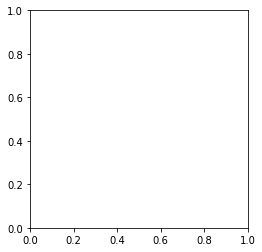

In [71]:
#Can I map this!?!

gdf.plot()

plt.show()  # invoking Matplotlib/PyPlot, as we've always done

In [66]:
# :(
# Maybe we can snag other stuff from the demo
countries = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [97]:
%%capture
!pip install geoplot;
import geoplot

In [98]:
location = data.loc[data.facility_name == 'St. Anthony Medical Clinic']

ax = geoplot.polyplot(location, projection=geoplot.crs.Robinson())

ax.outline_patch.set_visible(True)  # show the map outline

plt.show()

AttributeError: 'dict' object has no attribute 'loc'

In [48]:
# Found this online about working with URLs
import requests
url = 'https://data.sfgov.org/resource/jhsu-2pka.geojson'
response = requests.get(url)
data = response.json()
df = pd.io.json.json_normalize(data['features'])

In [50]:
%%capture
!pip install geoplot;
import geoplot

hospitals = gpd.read_file(gdf ['location'])

ax = geoplot.pointplot(hospitals, s = 1)  # size of each point

ax.set_title("Healthcare Facilities in SF")

plt.show()

AttributeError: 'Series' object has no attribute 'startswith'

### This clearly ain't working - I think the problem is the URL sourcing - let's move the Json data on to datahub and work from there!

In [74]:
# Let's do this for healthcare facilities first

import geopandas as gpd
import matplotlib.pyplot as plt

In [75]:
pip install geopandas matplotlib

You are using pip version 9.0.3, however version 20.0.2 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [76]:
%matplotlib inline

In [77]:
#Make sure I have a big enough window
plt.rcParams['figure.figsize'] = (20, 10)

In [89]:
df1_places = gpd.read_file('Health Care Facilities.geojson')
df1_admin = gpd.read_file('Health Care Facilities.geojson')

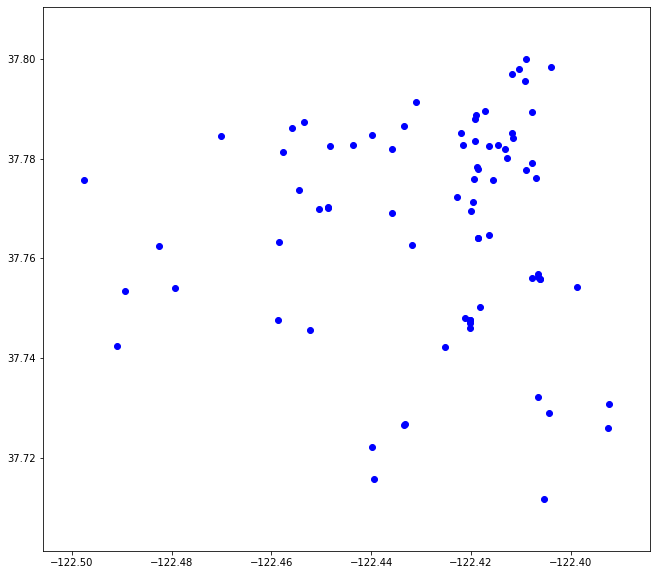

In [90]:
ax = df1_admin.plot(color='blue')

In [ ]:
# It seems to work, now let's do it for the transit network!

In [87]:
df2_places = gpd.read_file('Muni Simple Routes.geojson')
df2_admin = gpd.read_file('Muni Simple Routes.geojson')

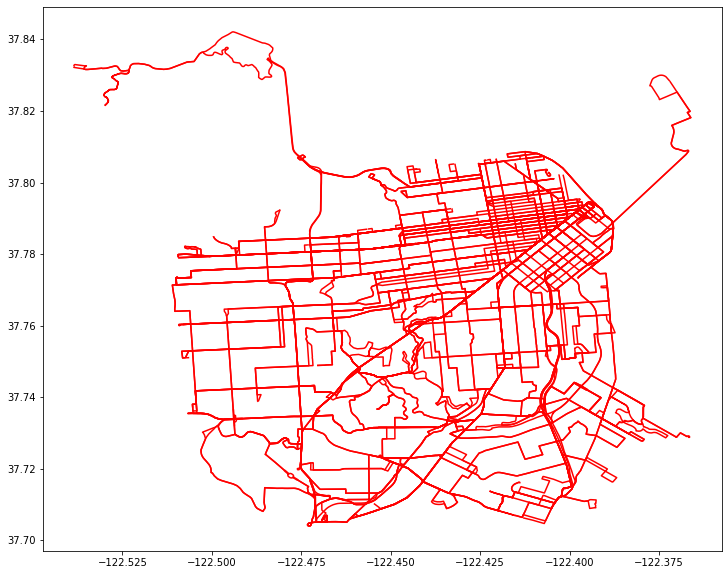

In [88]:
ax = df2_admin.plot(color='red')

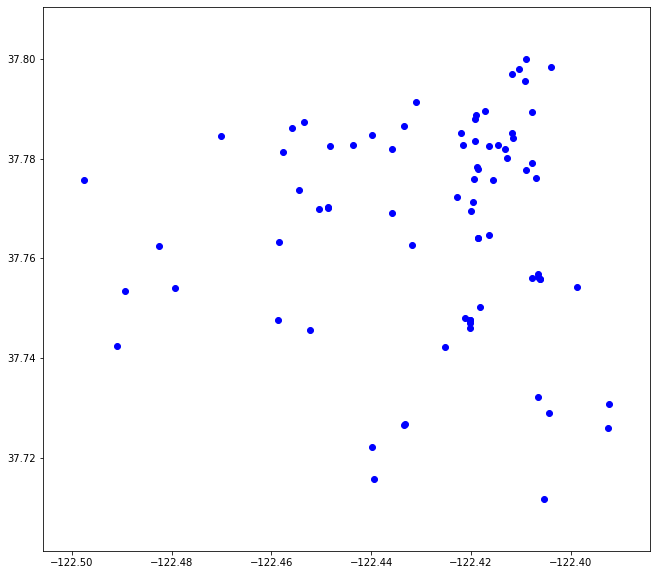

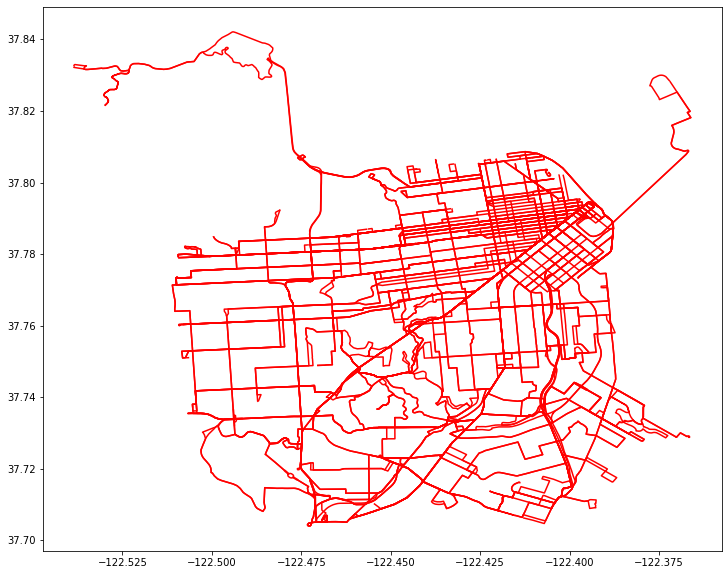

In [95]:
# Can they be on the same map?
ax = df1_admin.plot(color='blue')
df2_admin.plot(color='red')

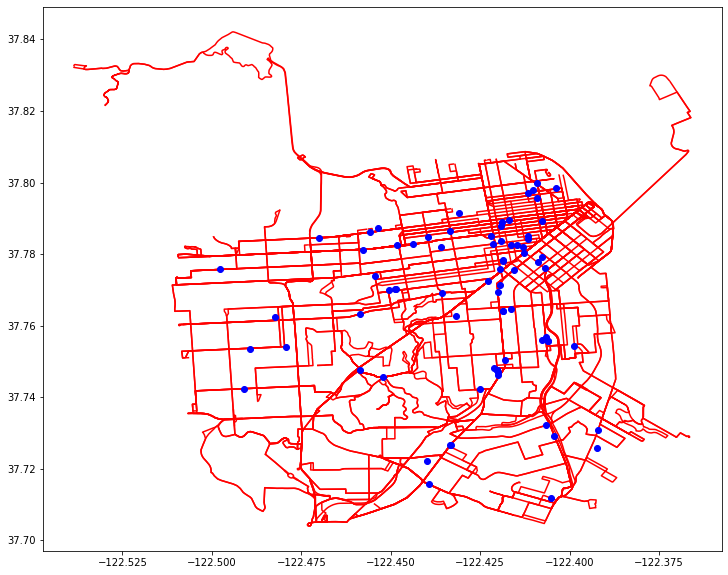

In [112]:
#Want to get these in the same map! - What does the web say?
    
ax = df1_admin.plot(color='blue', zorder=2)

df2_admin.plot(ax=ax, color='red', zorder=1)

In [ ]:
# Successsssss!